## Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#untuk model liear regression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

#metriks untuk evaluasi model
from sklearn.metrics import mean_squared_error

#untuk latih dan uji data
from sklearn.model_selection import train_test_split

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#metode time series ARIMA
from statsmodels.tsa.arima.model import ARIMA

## Import Data

In [ ]:
df_customer = pd.read_csv('Customer.csv', sep= ';')
df_product = pd.read_csv('Product.csv', sep= ';')
df_store = pd.read_csv('Store.csv', sep= ';')
df_transaction = pd.read_csv('Transaction.csv', sep= ';')

In [ ]:
print(df_customer)

     CustomerID  Age  Gender Marital Status Income
0             1   55       1        Married   5,12
1             2   60       1        Married   6,23
2             3   32       1        Married   9,17
3             4   31       1        Married   4,87
4             5   58       1        Married   3,57
..          ...  ...     ...            ...    ...
442         443   33       1            NaN   9,28
443         444   53       0        Married  15,31
444         445   51       0        Married  14,48
445         446   57       0        Married   7,81
446         447   54       1        Married  20,37

[447 rows x 5 columns]


## Data Cleansing and Preparation

In [ ]:
# Missing Value
missing1 = df_customer.isnull().sum()
missing2 = df_product.isnull().sum()
missing3 = df_store.isnull().sum()
missing4 = df_transaction.isnull().sum()

# Duplicate Rows
duplicate1 = df_customer.duplicated()
duplicate2 = df_product.duplicated()
duplicate3 = df_store.duplicated()
duplicate4 = df_transaction.duplicated()

# Describe data
df_customer.describe()

,CustomerID,Age,Gender
count,447.000000,447.000000,447.000000
mean,224.000000,39.782998,0.458613
std,129.182042,12.848719,0.498842
min,1.000000,0.000000,0.000000
25%,112.500000,30.000000,0.000000
50%,224.000000,39.000000,0.000000
75%,335.500000,50.500000,1.000000
max,447.000000,72.000000,1.000000


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
df_product.describe()

,Price
count,10.000000
mean,10410.000000
std,4890.455557
min,3200.000000
25%,7825.000000
50%,9700.000000
75%,14250.000000
max,18000.000000


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
df_store.describe()

,StoreID
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
df_transaction.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


## Merge Data

In [ ]:
merge1 = pd.merge(df_customer, df_transaction, on='CustomerID')
merge2 = pd.merge(merge1, df_product, on='ProductID')
merged = pd.merge(merge2, df_store, on='StoreID')
merged.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,"5,12",TR54475,23/02/2022,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
1,5,58,1,Married,"3,57",TR53643,22/05/2022,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2,7,31,0,Married,"4,57",TR5151,10/03/2022,P8,16000,2,32000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
3,19,24,1,Single,"4,14",TR98635,18/06/2022,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
4,28,55,0,Married,"6,08",TR9420,12/01/2022,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      5020 non-null   int64         
 1   Age             5020 non-null   int64         
 2   Gender          5020 non-null   int64         
 3   Marital Status  4976 non-null   object        
 4   Income          5020 non-null   object        
 5   TransactionID   5020 non-null   object        
 6   Date            5020 non-null   datetime64[ns]
 7   ProductID       5020 non-null   object        
 8   Price_x         5020 non-null   int64         
 9   Qty             5020 non-null   int64         
 10  TotalAmount     5020 non-null   int64         
 11  StoreID         5020 non-null   int64         
 12  Product Name    5020 non-null   object        
 13  Price_y         5020 non-null   int64         
 14  StoreName       5020 non-null   object        
 15  Grou

In [ ]:
merged.duplicated().sum()

0

## Machine Learning Regression (Time Series)

In [ ]:
# Menyesuaikan tipe data ke format yang sesuai
merged['Date'] = pd.to_datetime(merged['Date'])
merged['Latitude'] = merged['Latitude'].apply(lambda x: x.replace(',','.')).astype(float)
merged['Longitude'] = merged['Longitude'].apply(lambda x: x.replace(',','.')).astype(float)


<ipython-input-22-87db83757316>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged['Date'] = pd.to_datetime(merged['Date'])


In [ ]:
# data Time Series
data_time = merged.groupby('Date')['Qty'].sum().reset_index()

In [ ]:
# Persiapan data Time Series
data = data_time.set_index('Date')
# resample
data1 = data.resample('D').sum()

In [ ]:
data1.head()

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67


<Axes: xlabel='Date'>

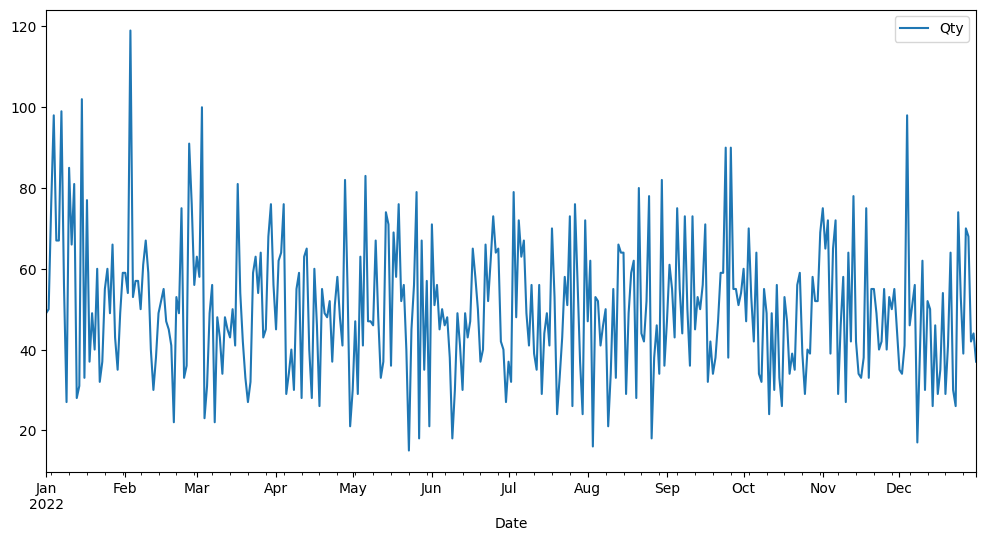

In [ ]:
# Data Visualization
data1.plot(figsize=(12,6))

In [ ]:
# Train data dengan cara memisahkannya
train_size = int(len(data2) * 0.8)
train_data, test_data = data2[:train_size], data2[train_size:]
print(train_data.shape, test_data.shape)

(292, 1) (73, 1)


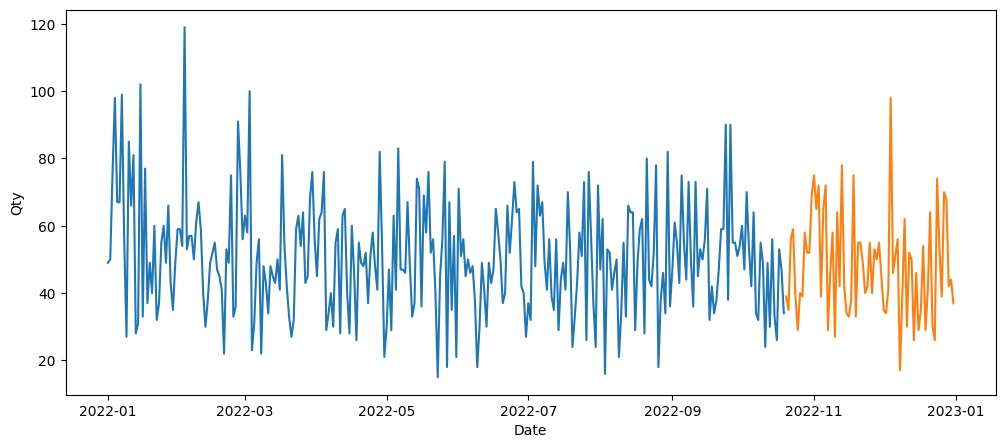

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'])
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'])
plt.show()

In [ ]:
# menggunakan metode time series ARIMA (Autoregressive Integrated Moving Average)

# misalakan sudah memiliki data time series dengan'train_data' :
# 1. Tentukan nilai =
p = 2  # Order of Autoregression
d = 2  # Degree of Differencing
q = 2  # Order of Moving Average

# 2. model ARIMA dengan parameter
model = ARIMA(train_data, order=(p, d, q))

# 3: Latih model
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

# Evaluasi performa
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 236.95776973292834


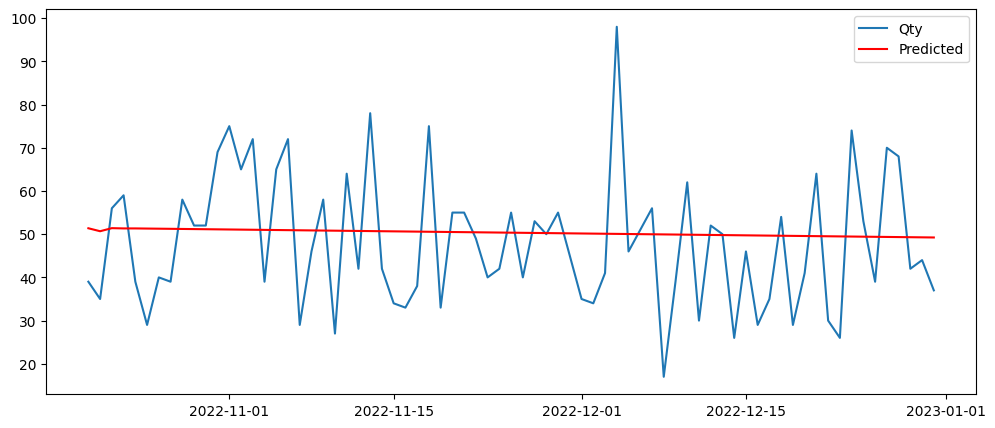

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test_data, label='Qty')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

## Machine Learning Clustering

In [ ]:
# Menggabungkan data berdasarkan CustomerID
aggregate = merged.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

aggregate

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [ ]:
# persiapan data clustering
X = aggregate[['TransactionID', 'Qty', 'TotalAmount']]

In [ ]:
# Model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# clustering data
aggregate_data['cluster'] = kmeans.fit_predict(X)

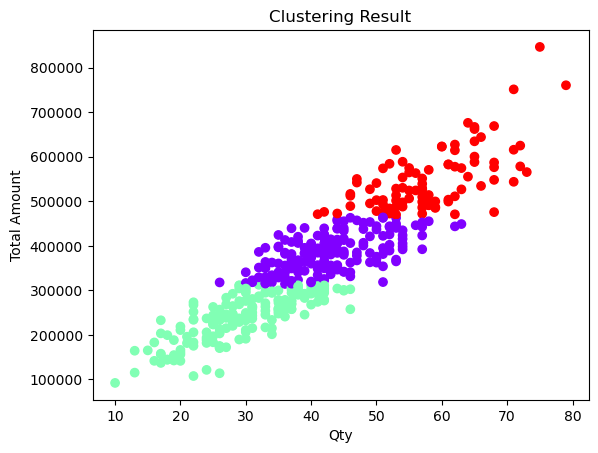

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(aggregate['Qty'], aggregate_data['TotalAmount'], c=aggregate_data['cluster'], cmap='rainbow')
plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Clustering Result')
plt.show()

In [ ]:
# Membuat WCSS (Within-Cluster Sum of Squares)
wcss= []
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model1.fit(X)
    wcss.append(model1.inertia_)
print(wcss)

[6928031859602.738, 2434755241638.5283, 1233416630536.0532, 776512017046.2605, 504081360603.5857, 382121220808.0775, 277934833180.1248, 212853440612.7635, 171266010275.35165, 137780280512.4177]


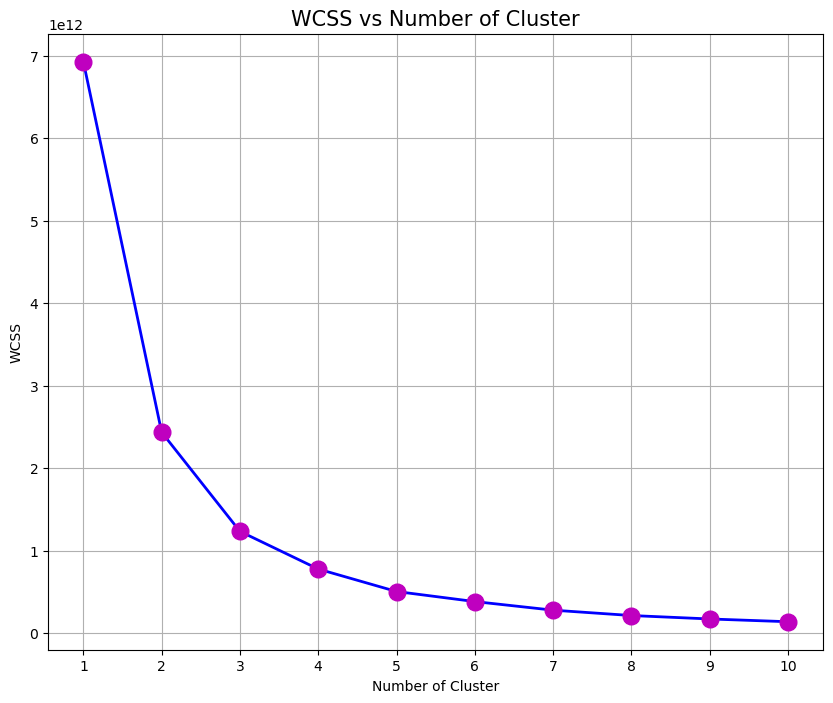

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,11)), wcss, color = 'blue', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'm',
         markeredgecolor= 'm')
plt.title('WCSS vs Number of Cluster', fontsize = 15)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.grid()
plt.show()

In [ ]:
# mengoptimalkan Model Clustering dengan K
model1 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(X)
labels1=model1.labels_
centroids1 =model1.cluster_centers_

In [ ]:
df_cluster = aggregate.drop(columns = ['CustomerID'])
df_cluster.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [ ]:
# cluster ke dalam dataset
df_cluster['cluster'] = model1.labels_
df_cluster.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,0
1,13,57,392300,2
2,15,56,446200,2
3,10,46,302500,1
4,7,27,268600,1


<Figure size 600x600 with 0 Axes>

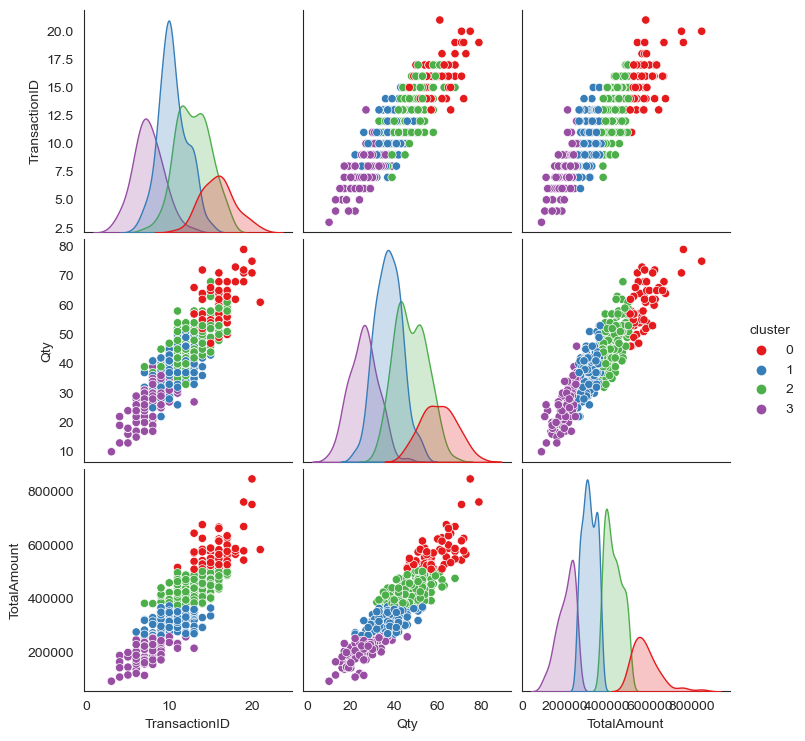

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster,hue='cluster',palette='Set1')
plt.show()

In [ ]:
df_cluster['CustomerID'] = aggregate['CustomerID']
df_cluster_mean = df_cluster.groupby('cluster').agg({
    'CustomerID':'count',
    'TransactionID':'mean',
    'Qty':'mean',
    'TotalAmount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
1,152,10.414474,37.263158,316792.763158
2,140,12.871429,47.521429,431575.000000
3,98,7.448980,25.867347,206380.612245
0,57,15.877193,60.421053,583240.350877


## Kesimpulan

## Cluster 0
- Cluster dengan jumlah pelanggan paling rendah.

1.   Pelanggan dalam Cluster ini memiliki peringkat tertinggi dalam setiap metrik mereka.

Rekomendasi:
1. Tawarkan program loyalitas untuk menjaga transaksi tetap tinggi.
Lakukan penilaian kepuasan pelanggan.
2. Dorong peningkatan penjualan produk dengan harga yang lebih tinggi.

##Cluster 1

1.   Cluster dengan jumlah pelanggan terbesar.
2.   Ciri utama dari Cluster ini adalah bahwa Cluster ini berada di peringkat ketiga dalam setiap metrik (transaction, quantity, total amount).

Rekomendasi:

1.   Memperkuat relasi dengan pelanggan.
2.   Melakukan penelitian atau survei untuk meningkatkan minat dari pelanggan yang dominan.

##Cluster 2

1. Cluster dengan karakteristik pelanggan yang menduduki posisi kedua tertinggi dalam setiap metrik.

Rekomendasi:

1. Rutin memberikan promosi untuk merangsang peningkatan transaksi.
2. Meningkatkan penjualan produk dengan harga yang lebih tinggi.


##Cluster 3

1. Cluster dengan karakteristik pelanggan yang memiliki peringkat terendah dalam setiap metrik.

Rekomendasi:

1. Memberikan potongan harga yang besar untuk merangsang peningkatan transaksi pelanggan.
2. Menyediakan promosi untuk transaksi dengan jumlah barang yang lebih tinggi.
3. Melakukan penelitian untuk mengenali peluang pengembangan produk.
